In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


from keras.layers import Dense, Input, Dropout, Conv2D, MaxPool2D, Flatten
from keras.models import Model

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [3]:
X = data[:, 2:].reshape(-1, 28, 28, 1)
y = data[:, 1]

In [4]:
ohe = OneHotEncoder(categories="auto")

In [5]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [7]:
X[0].shape

(28, 28, 1)

In [8]:
in_layer = Input(shape=[28, 28, 1])
conv_1 = Conv2D(32, (3, 3), activation="relu")(in_layer)
pool_1 = MaxPool2D()(conv_1)
conv_2 = Conv2D(64, (3, 3), activation="relu")(pool_1)
pool_2 = MaxPool2D()(conv_2)
conv_3 = Conv2D(128, (3, 3), activation="relu")(pool_2)
pool_3 = MaxPool2D()(conv_3)
flatten = Flatten()(pool_3)
dense_1 = Dense(200, activation="tanh")(flatten)
dense_2 = Dense(100, activation="tanh")(dense_1)
drop = Dropout(rate=.25)(dense_2)
dense_3 = Dense(50, activation="tanh")(drop)
out = Dense(10, activation="softmax")(dense_3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model = Model(inputs=[in_layer], outputs=[out])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
__________

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [12]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
5360/5360 [==============================] - 3s 614us/step - loss: 1.5995 - acc: 0.5069
Epoch 2/10
5360/5360 [==============================] - 3s 478us/step - loss: 0.7172 - acc: 0.8207
Epoch 3/10
5360/5360 [==============================] - 3s 473us/step - loss: 0.4111 - acc: 0.8978
Epoch 4/10
5360/5360 [==============================] - 3s 504us/step - loss: 0.3056 - acc: 0.9170
Epoch 5/10
5360/5360 [==============================] - 3s 552us/step - loss: 0.2280 - acc: 0.9412
Epoch 6/10
5360/5360 [==============================] - 3s 517us/step - loss: 0.1754 - acc: 0.9552
Epoch 7/10
5360/5360 [==============================] - 2s 460us/step - loss: 0.1421 - acc: 0.9629
Epoch 8/10
5360/5360 [==============================] - 3s 480us/step - loss: 0.1153 - acc: 0.9703
Epoch 9/10
5360/5360 [==============================] - 3s 531us/step - loss: 0.0971 - acc: 0.9750
Epoch 10/10
5360/5360 [==============================] - 3s 4

In [13]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 0s 188us/step


[0.13838297654733514, 0.9625]

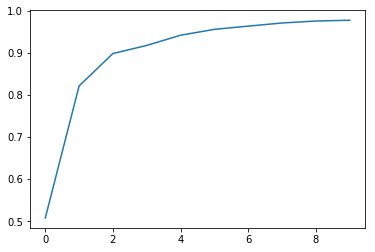

In [14]:
plt.plot(hist.history["acc"])

In [15]:
m2 = Model(inputs=[in_layer], outputs=[out])

In [16]:
m2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [17]:
m2.evaluate(X_test, y_test)

2640/2640 [==============================] - 1s 209us/step


[0.13838297654733514, 0.9625]

In [33]:
m2 = Model(inputs=[in_layer], outputs=[conv_1])

In [40]:
images = m2.predict(X_test[:30])

In [42]:
images.shape

(30, 26, 26, 32)

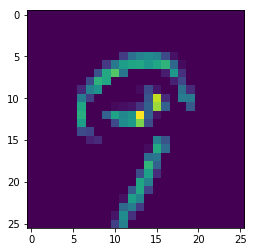

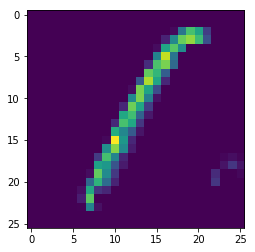

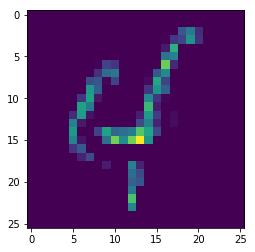

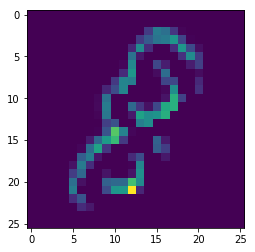

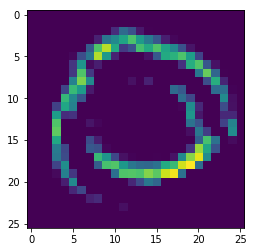

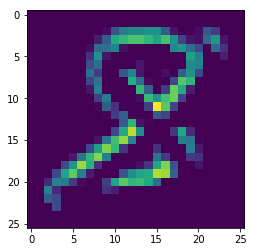

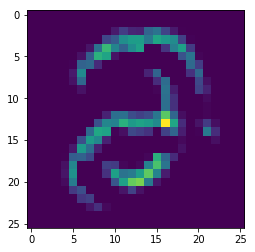

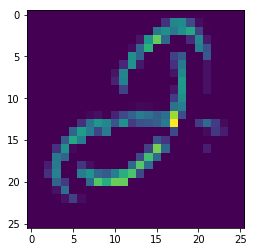

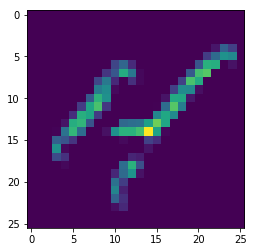

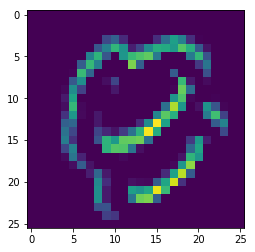

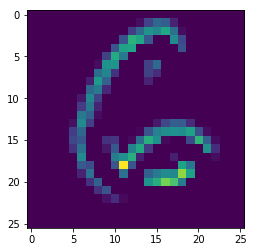

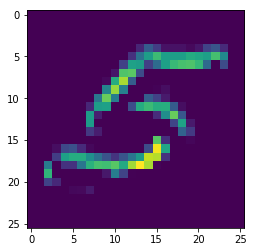

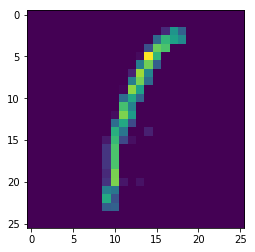

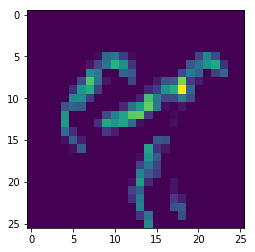

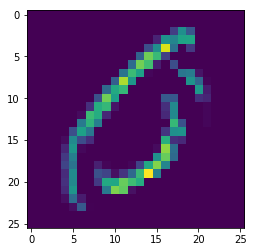

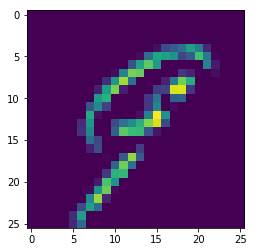

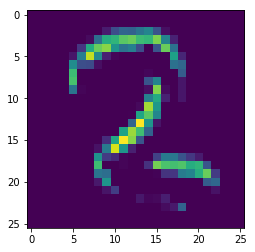

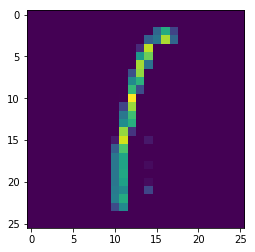

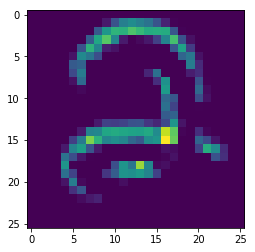

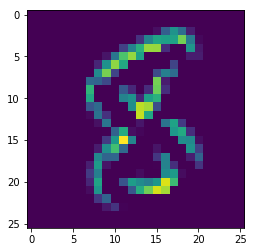

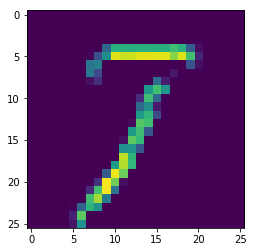

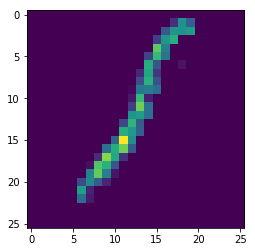

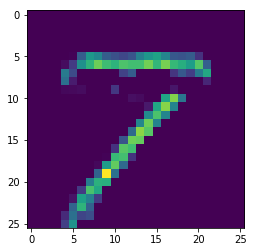

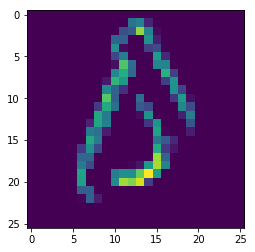

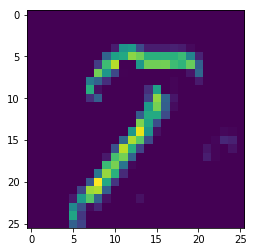

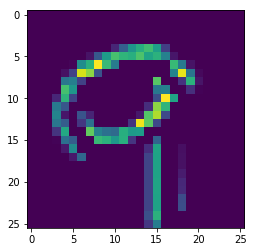

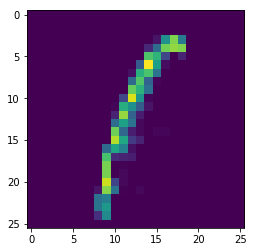

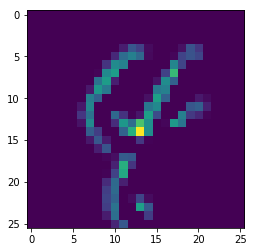

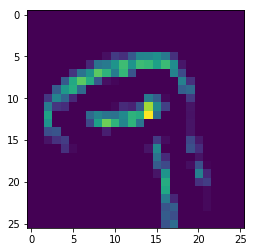

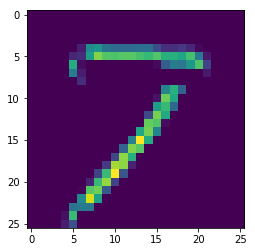

In [41]:
for i in range(30):
    
    plt.figure()
    plt.imshow(images[i,:, :, 0])

In [60]:
selected = model.layers[:-5]

In [61]:
de_1 = Dense(200, activation="tanh")(selected[-1].output)
de_2 = Dense(100, activation="tanh")(de_1)
dr = Dropout(rate=.25)(de_2)
de_3 = Dense(50, activation="tanh")(dr)
oe = Dense(10, activation="softmax")(de_3)

In [62]:
transfer_model = Model(inputs=[selected[0].input], outputs=[oe])

In [63]:
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
__________

In [64]:
for layer in selected:
    layer.trainable = False

In [65]:
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
__________

In [66]:
transfer_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [67]:
transfer_model.fit(X_train, y_train, epochs=4, batch_size=200)

Epoch 1/4
5360/5360 [==============================] - 1s 273us/step - loss: 1.0912 - acc: 0.7438
Epoch 2/4
5360/5360 [==============================] - 1s 195us/step - loss: 0.2428 - acc: 0.9578
Epoch 3/4
5360/5360 [==============================] - 1s 175us/step - loss: 0.1439 - acc: 0.9703
Epoch 4/4
5360/5360 [==============================] - 1s 159us/step - loss: 0.1080 - acc: 0.9782


In [68]:
transfer_model.evaluate(X_test, y_test)

2640/2640 [==============================] - 1s 207us/step


[0.13157876720934203, 0.9643939393939394]